In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
uber_df=pd.read_csv("/content/drive/MyDrive/UberDataset.csv")
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
uber_df.shape

(1156, 7)

In [ ]:
uber_df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [ ]:
uber_df.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [ ]:
# Convert the 'START_DATE' and 'END_DATE' columns to datetime with 'coerce'
uber_df['START_DATE'] = pd.to_datetime(uber_df['START_DATE'], errors='coerce')
uber_df['END_DATE'] = pd.to_datetime(uber_df['END_DATE'], errors='coerce')

# Now, check the data types of 'START_DATE' and 'END_DATE' columns
print("Data type of 'START_DATE':", uber_df['START_DATE'].dtype)
print("Data type of 'END_DATE':", uber_df['END_DATE'].dtype)

Data type of 'START_DATE': datetime64[ns]
Data type of 'END_DATE': datetime64[ns]


In [ ]:
uber_df['START'] = uber_df['START'].replace("Kar?chi", "Karachi")
uber_df['STOP'] = uber_df['STOP'].replace("Kar?chi", "Karachi")

In [ ]:
#Droping na values except "Purpose"
columns_to_drop = uber_df.columns.drop('PURPOSE')
uber_df.dropna(subset=columns_to_drop, inplace=True)
uber_df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


In [ ]:
Null_per_Col = uber_df.isna().sum()
print("Number of NaN values per column: ")
print(Null_per_Col)

Number of NaN values per column: 
START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64


EDA


In [ ]:
columns_to_check = ['CATEGORY' , 'PURPOSE']

for column in columns_to_check:
    distinct_values = uber_df[column].unique()
    print(f"Distinct values in '{column}':")
    print(distinct_values)
    print()

Distinct values in 'CATEGORY':
['Business' 'Personal']

Distinct values in 'PURPOSE':
['Meal/Entertain' nan 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']



In [ ]:
average_miles_by_purpose = uber_df.groupby('PURPOSE')['MILES'].mean()
average_miles_by_purpose

PURPOSE
Airport/Travel       5.500000
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      20.688119
Errand/Supplies      3.968750
Meal/Entertain       5.698125
Meeting             15.247594
Moving               4.550000
Temporary Site      10.474000
Name: MILES, dtype: float64

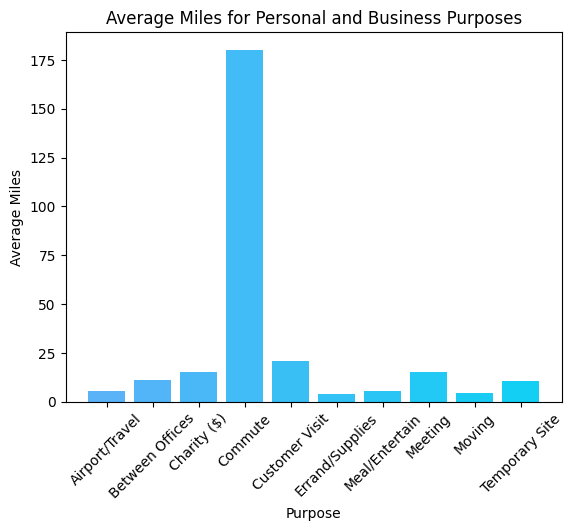

In [ ]:
colors = ['#5AB2F7', '#52B5F7', '#4AB8F6', '#42BCF6', '#3ABFF5', '#32C2F5', '#2AC5F4', '#22C9F4', '#1ACCF3', '#12CFF3']

# Plotting the bar chart
plt.bar(average_miles_by_purpose.index, average_miles_by_purpose.values , color=colors)
plt.xlabel('Purpose')
plt.ylabel('Average Miles')
plt.title('Average Miles for Personal and Business Purposes')
plt.xticks(rotation=45)
plt.show()

In [ ]:
average_miles_by_cat = uber_df.groupby('CATEGORY')['MILES'].mean()
average_miles_by_cat

CATEGORY
Business    10.655844
Personal     9.320779
Name: MILES, dtype: float64

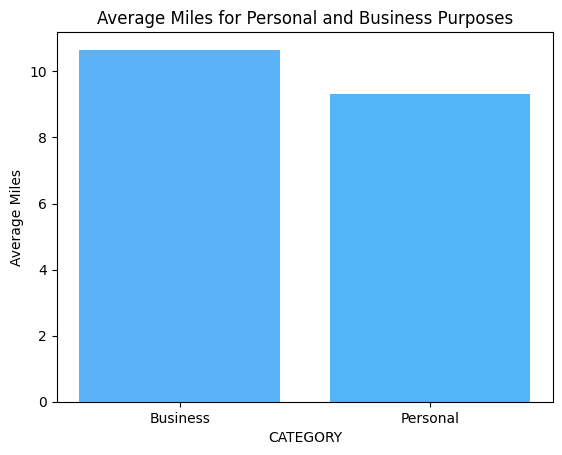

In [ ]:
plt.bar(average_miles_by_cat.index, average_miles_by_cat.values , color=colors)
plt.xlabel('CATEGORY')
plt.ylabel('Average Miles')
plt.title('Average Miles for Personal and Business Purposes')
plt.show()

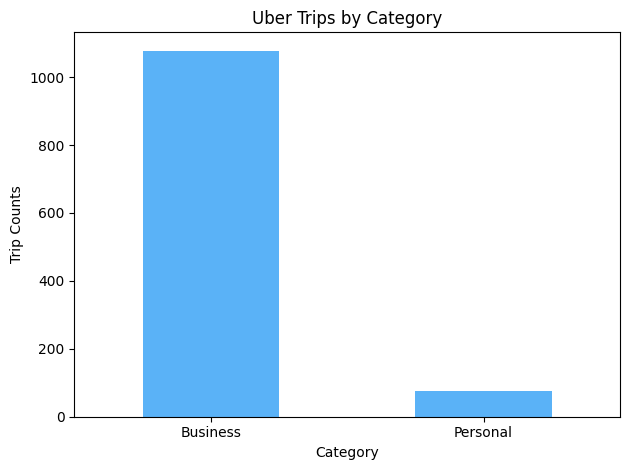

In [ ]:
trips = pd.DataFrame(uber_df["CATEGORY"].value_counts())

color = ['#5AB2F7', '#12CFF3']

ax = trips.plot(kind="bar", color=color, legend=None)

plt.xlabel('Category')
plt.ylabel('Trip Counts')
plt.title('Uber Trips by Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate ride durations as the difference between END_DATE and START_DATE
uber_df['ride_duration'] = uber_df['END_DATE'] - uber_df['START_DATE']

# Calculate min, max, and average ride durations
min_duration = uber_df['ride_duration'].min()
max_duration = uber_df['ride_duration'].max()
average_duration = uber_df['ride_duration'].mean()

print("Minimum ride duration:", min_duration)
print("Maximum ride duration:", max_duration)
print("Average ride duration:", average_duration)

Minimum ride duration: 0 days 00:00:00
Maximum ride duration: 0 days 05:36:00
Average ride duration: 0 days 00:23:14.597402597


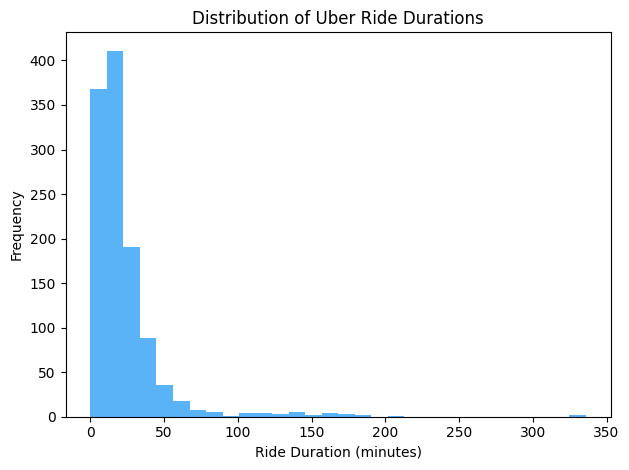

In [ ]:
#Making plot
plt.hist(uber_df['ride_duration'].dt.total_seconds() / 60, bins=30 , color= '#5AB2F7')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Uber Ride Durations')
plt.tight_layout()
plt.show()

In [ ]:
# Get the top 10 start stations
top_10_start_stations = uber_df['START'].value_counts().nlargest(10)

# Get the top 10 stop stations
top_10_stop_stations = uber_df['STOP'].value_counts().nlargest(10)

print("Top 10 Start Stations:")
print(top_10_start_stations)

print("\nTop 10 Stop Stations:")
print(top_10_stop_stations)

Top 10 Start Stations:
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Karachi              31
Raleigh              28
Westpark Place       17
Name: START, dtype: int64

Top 10 Stop Stations:
Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Karachi              28
Apex                 17
Name: STOP, dtype: int64


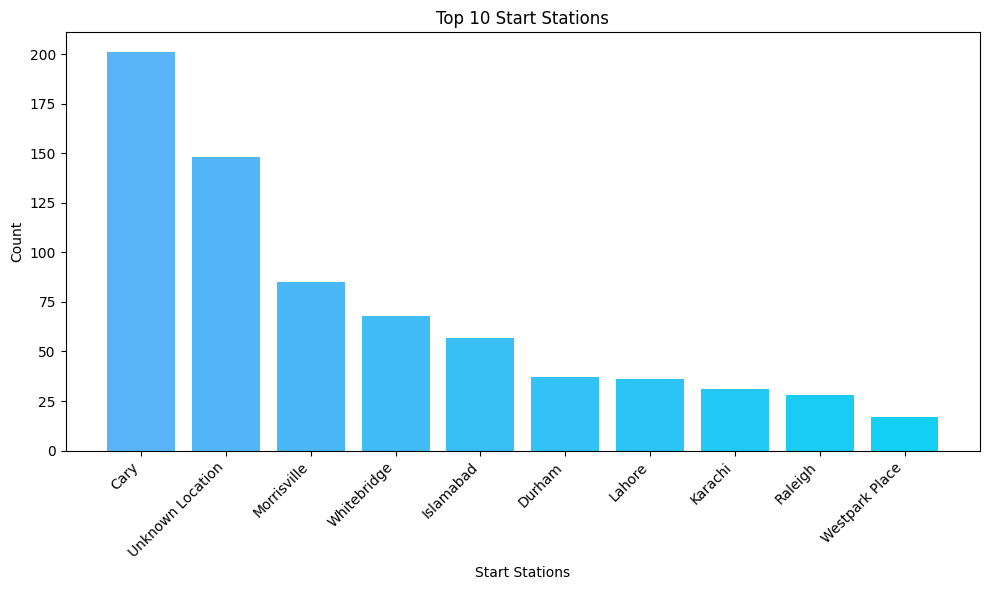

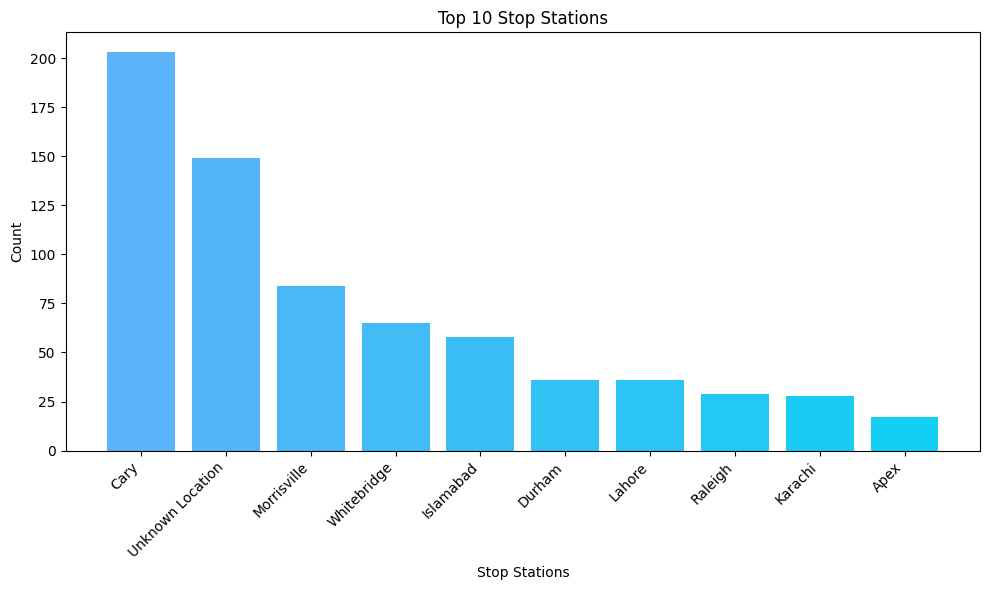

In [ ]:
# Plotting the top 10 start stations
plt.figure(figsize=(10, 6))
plt.bar(top_10_start_stations.index, top_10_start_stations.values  , color=colors)
plt.xlabel('Start Stations')
plt.ylabel('Count')
plt.title('Top 10 Start Stations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the top 10 stop stations
plt.figure(figsize=(10, 6))
plt.bar(top_10_stop_stations.index, top_10_stop_stations.values , color=colors)
plt.xlabel('Stop Stations')
plt.ylabel('Count')
plt.title('Top 10 Stop Stations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

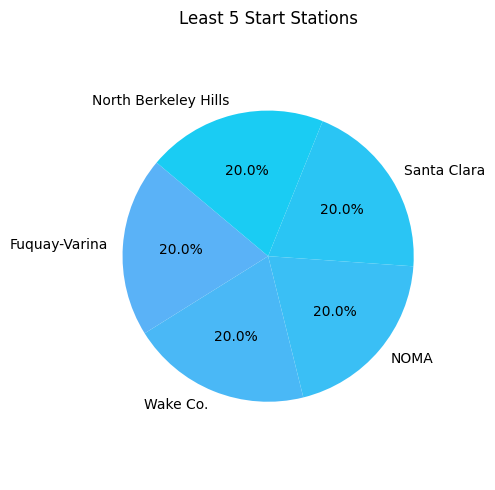

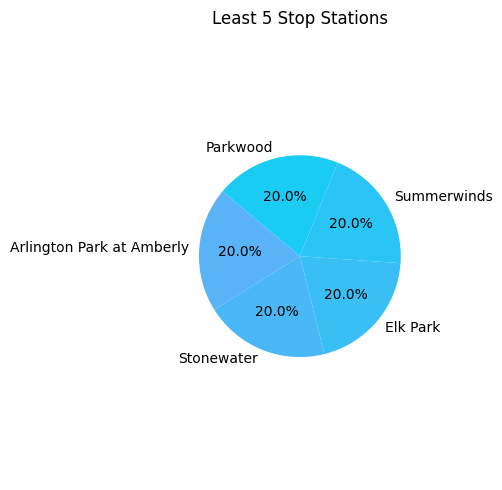

In [ ]:
# Get the least 5 start stations
least_5_start_stations = uber_df['START'].value_counts().nsmallest(5)

# Get the least 5 stop stations
least_5_stop_stations = uber_df['STOP'].value_counts().nsmallest(5)

five_colors = ['#5AB2F7', '#4AB8F6', '#3ABFF5', '#2AC5F4', '#1ACCF3']

# Plotting the top 10 start stations as a pie chart
plt.figure(figsize=(5, 5))
plt.pie(least_5_start_stations, labels=least_5_start_stations.index, autopct='%1.1f%%', startangle=140, colors=five_colors)
plt.axis('equal')
plt.title('Least 5 Start Stations')
plt.tight_layout()
plt.show()

# Plotting the top 10 stop stations as a pie chart
plt.figure(figsize=(5, 5))
plt.pie(least_5_stop_stations, labels=least_5_stop_stations.index, autopct='%1.1f%%', startangle=140, colors=five_colors)
plt.axis('equal')
plt.title('Least 5 Stop Stations')
plt.tight_layout()
plt.show()